<a href="https://colab.research.google.com/github/LeaCarop/LinearRegression_tf.keras/blob/main/CaliforniaHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CALIFORNIA HOUSING DATASET**

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [29]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [30]:
scale_factor = 1000

train_df['median_house_value'] /= scale_factor
test_df['median_house_value'] /= scale_factor

In [18]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


In [31]:
def build_model(my_learning_rate):

  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch
  
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   


In [32]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


136/136 [==============================] - 1s 3ms/step - loss: 38955.4766 - root_mean_squared_error: 197.3714 - val_loss: 47250.5195 - val_root_mean_squared_error: 217.3718
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 22340.6816 - root_mean_squared_error: 149.4680 - val_loss: 27573.3828 - val_root_mean_squared_error: 166.0523
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 11837.7139 - root_mean_squared_error: 108.8013 - val_loss: 14867.0098 - val_root_mean_squared_error: 121.9304
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 7141.2349 - root_mean_squared_error: 84.5058 - val_loss: 9476.9834 - val_root_mean_squared_error: 97.3498
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 6511.9102 - root_mean_squared_error: 80.6964 - val_loss: 9216.9375 - val_root_mean_squared_error: 96.0049
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 6513.7075 - root_mean_squ

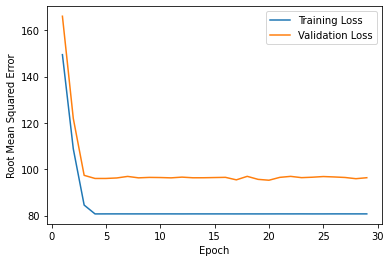

In [34]:
learning_rate = 0.08
epochs = 30
batch_size = 100

validation_split = 0.2

my_feature = "median_income"   
my_label = "median_house_value"

my_model = None

my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

Las curvas de entrenamiento y test difieren significativamente. 

Para solucionarlo voy realizar dos pasos: 

- Revolver los datos en el conjunto de entrenamiento agregando shuffled_train_df
- Pasar el nuevo argumento a train model

Epoch 1/70


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


136/136 [==============================] - 1s 3ms/step - loss: 46178.3359 - root_mean_squared_error: 214.8914 - val_loss: 33919.3281 - val_root_mean_squared_error: 184.1720
Epoch 2/70
136/136 [==============================] - 0s 2ms/step - loss: 27350.3887 - root_mean_squared_error: 165.3795 - val_loss: 18901.6113 - val_root_mean_squared_error: 137.4831
Epoch 3/70
136/136 [==============================] - 0s 2ms/step - loss: 14748.9248 - root_mean_squared_error: 121.4452 - val_loss: 9957.8945 - val_root_mean_squared_error: 99.7893
Epoch 4/70
136/136 [==============================] - 0s 2ms/step - loss: 8390.8369 - root_mean_squared_error: 91.6015 - val_loss: 6914.1431 - val_root_mean_squared_error: 83.1513
Epoch 5/70
136/136 [==============================] - 0s 2ms/step - loss: 7069.8130 - root_mean_squared_error: 84.0822 - val_loss: 6855.4175 - val_root_mean_squared_error: 82.7974
Epoch 6/70
136/136 [==============================] - 0s 2ms/step - loss: 7050.4980 - root_mean_squar

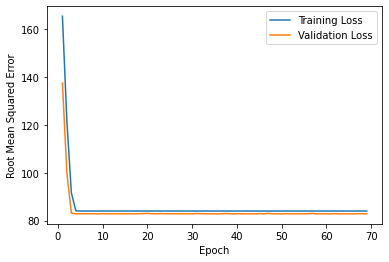

In [36]:
learning_rate = 0.08
epochs = 70
batch_size = 100

validation_split = 0.2

my_feature = "median_income"   
my_label = "median_house_value"

my_model = None

shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index)) # PASO 1

my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature,  # PASO 2
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

Después de barajar el conjunto de entrenamiento original, la función de pérdida para train y test se vuelve más cercano.

Ejecuto las siguientes líneas de código para para evaluar el modelo con los datos de validación.

In [37]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 3ms/step - loss: 7010.5073 - root_mean_squared_error: 83.7288


Si comparamos estos resultados con la última línea del código anterior se ve la semejanza de resultados. El RMSE es lo suficientemente similar, al igual que la función de pérdida.